# **Business Case: Yulu - Hypothesis Testing**

## **About Yulu**
Yulu is **India's leading micro-mobility service provider**, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

## **Business Problem**
Yulu has recently suffered considerable **dips in its revenues**. They have contracted us to understand the **factors on which the demand for these shared electric cycles depends**. Specifically, they want to understand the **factors affecting the demand** for these shared electric cycles in the **Indian market**.
The company wants to know:
1. Which **variables** are significant in **predicting the demand** for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands.

## **1. Importing the Dataset, required Libraries and performing Exploratory Data Analysis.**

In [262]:
#Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm, ttest_ind, f_oneway, shapiro, levene, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

In [190]:
#Loading data as pandas dataframe
df_orig=pd.read_csv("bike_sharing.csv")

In [191]:
#dataframe
df_orig.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [192]:
df_orig.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [193]:
#shape of the dataset
df_orig.shape

(10886, 12)

In [194]:
#data type of all columns
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [195]:
#Changing datatype of datetime and other categorical columns.
df_orig["datetime"] = pd.to_datetime(df_orig["datetime"])
df_orig["season"] = df_orig["season"].astype("object")
df_orig["holiday"] = df_orig["holiday"].astype("object")
df_orig["workingday"] = df_orig["workingday"].astype("object")
df_orig["weather"] = df_orig["weather"].astype("object")

In [196]:
#updated data type of all columns
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [197]:
#Number of unique values for each column
for i in df_orig.columns:
  print(i,":",df_orig[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [198]:
for i in ["season", "holiday", "workingday", "weather"]:
  print(i,":",df_orig[i].unique())

season : [1 2 3 4]
holiday : [0 1]
workingday : [0 1]
weather : [1 2 3 4]


In [199]:
#statistical summary
df_orig.describe(include="all").T

<ipython-input-199-beef9f2b76b3>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_orig.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01 00:00:00,1,2011-01-01,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886.0,4.0,4.0,2734.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,10886.0,2.0,0.0,10575.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,10886.0,2.0,1.0,7412.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,10886.0,4.0,1.0,7192.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,10886.0,NaN,NaN,NaN,NaT,NaT,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0
atemp,10886.0,NaN,NaN,NaN,NaT,NaT,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,NaN,NaN,NaN,NaT,NaT,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,NaN,NaN,NaN,NaT,NaT,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
casual,10886.0,NaN,NaN,NaN,NaT,NaT,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0


In [200]:
#missing value detection
df_orig.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [201]:
#checking for duplicated rows
df_orig.duplicated().value_counts()

False    10886
dtype: int64

### **Observation:**
1.	There are **10886 rows** and **12 columns** in dataset.
2.	**Datatype** of datetime column and some other categorical column like season, holiday, workingday and weather was **not proper**. We assigned it appropriate datatype.
3.	There are **no missing values** in the dataset.
4. There is **no duplicate row** in the dataset.
5.	Details of **categorical columns**,

  **season**: season (1: spring, 2: summer, 3: fall, 4: winter)
  
  **holiday**: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
  
  **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.
  
  **weather**:

  1: Clear, Few clouds, partly cloudy, partly cloudy

  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


# **Detecting Outliers (Distribution of Numerical variables).**

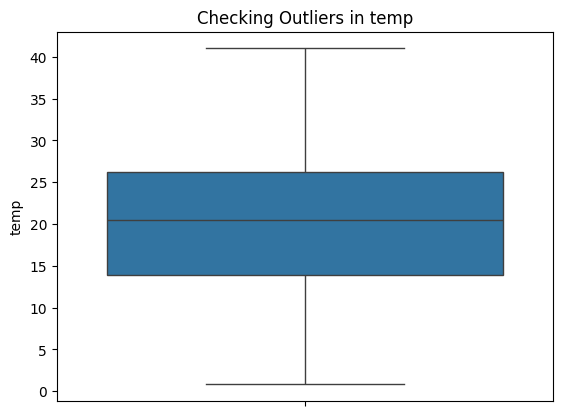

In [202]:
#temp
sns.boxplot(y=df_orig["temp"])
plt.title(("Checking Outliers in temp"))
plt.show()

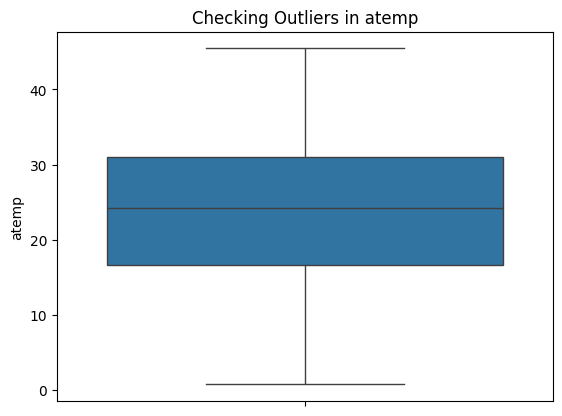

In [203]:
#atemp
sns.boxplot(y=df_orig["atemp"])
plt.title(("Checking Outliers in atemp"))
plt.show()

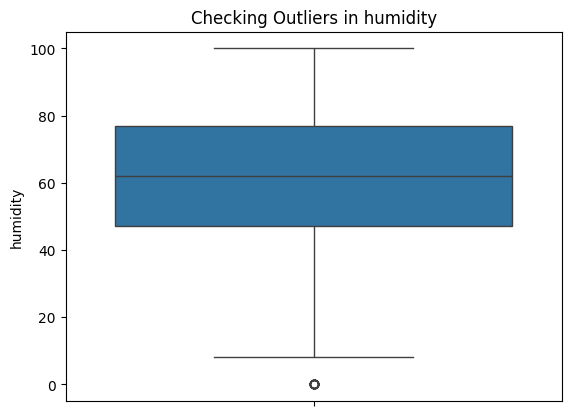

In [204]:
#humidity
sns.boxplot(y=df_orig["humidity"])
plt.title(("Checking Outliers in humidity"))
plt.show()

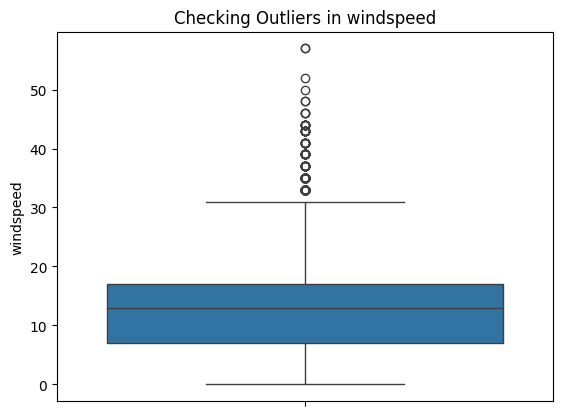

In [205]:
#windspeed
sns.boxplot(y=df_orig["windspeed"])
plt.title(("Checking Outliers in windspeed"))
plt.show()

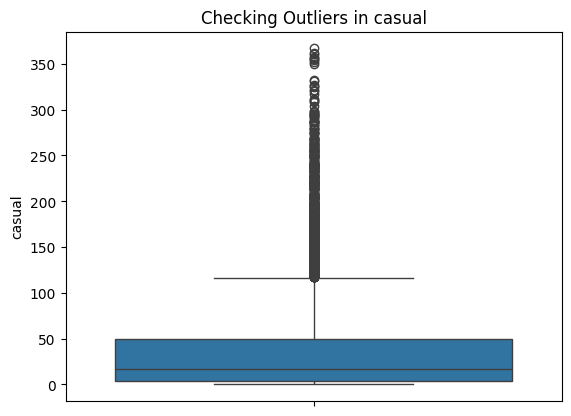

In [206]:
#casual
sns.boxplot(y=df_orig["casual"])
plt.title(("Checking Outliers in casual"))
plt.show()

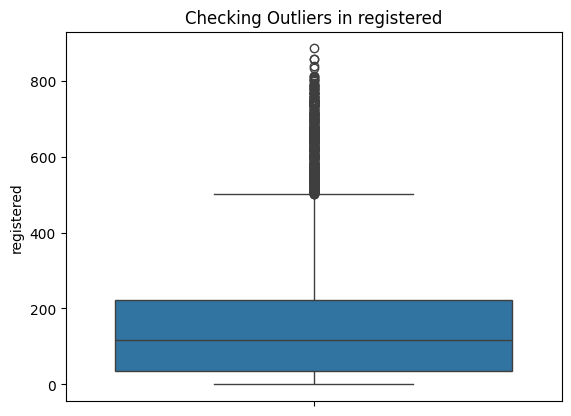

In [207]:
#registered
sns.boxplot(y=df_orig["registered"])
plt.title(("Checking Outliers in registered"))
plt.show()

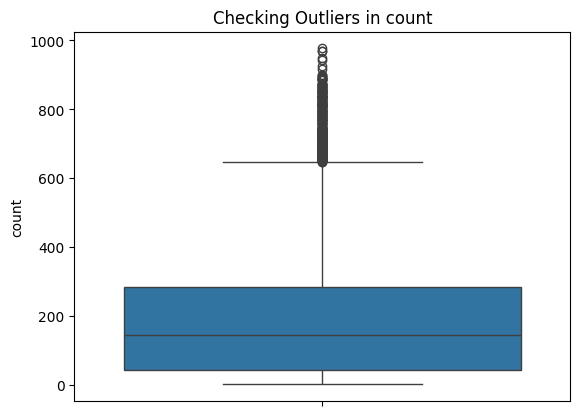

In [208]:
#count
sns.boxplot(y=df_orig["count"])
plt.title(("Checking Outliers in count"))
plt.show()

### **Obervation:**
1. There are **very few** outliers in "**windspeed**" column which can be safely ignored.
2. Column **casual, registered and count** have quite **large number of outliers** which require treatment.
3. Since "count" column is the sum of "casual" and "registered" columns, handling outliers of "count column should also take care of outliers of other two columns.
4. Mean temperature is around 20 C and majority of the data lies between 10 C to 30 C.
5. Mean humidity is around 60 and majority of the data lies between 40 to 80.


## **Handling outliers**

In [209]:
#Defining Lower and Upper Limit for count
q1=df_orig["count"].quantile(0.25)
q3=df_orig["count"].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

#Removing the "count" column Outliers
df=df_orig[(df_orig["count"]>lower_limit)&(df_orig["count"]<upper_limit)]


#Defining Lower and Upper Limit for casual
q1=df_orig["casual"].quantile(0.25)
q3=df_orig["casual"].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

#Further removing the "casual" column Outliers
df=df[(df["casual"]>lower_limit)&(df["casual"]<upper_limit)]


#Defining Lower and Upper Limit for registered
q1=df_orig["registered"].quantile(0.25)
q3=df_orig["registered"].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

#Further removing the "registered" column Outliers
df=df[(df["registered"]>lower_limit)&(df["registered"]<upper_limit)]


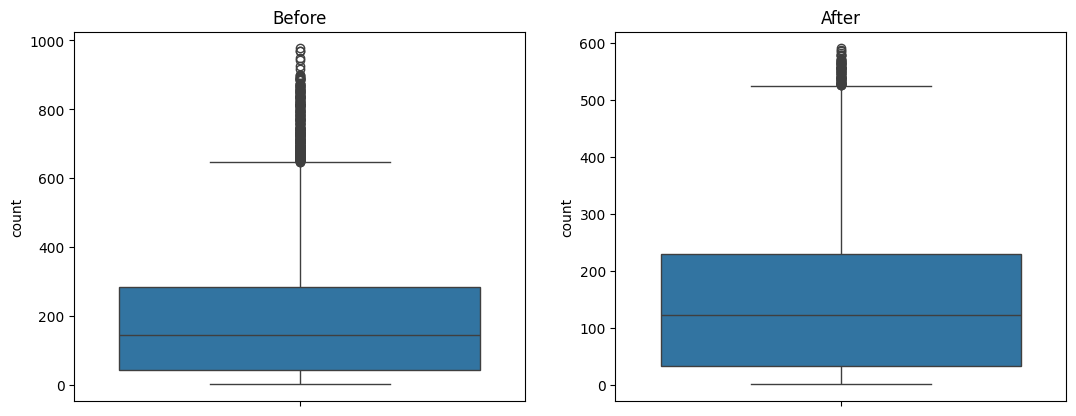

In [210]:
#Verifying Outliers in "count" column of the new dataframe

plt.figure(figsize = (12.8, 4.8))

plt.subplot(1,2,1)
#count
sns.boxplot(y=df_orig["count"])
plt.title(("Before"))

plt.subplot(1,2,2)
#count
sns.boxplot(y=df["count"])
plt.title(("After"))

plt.show()

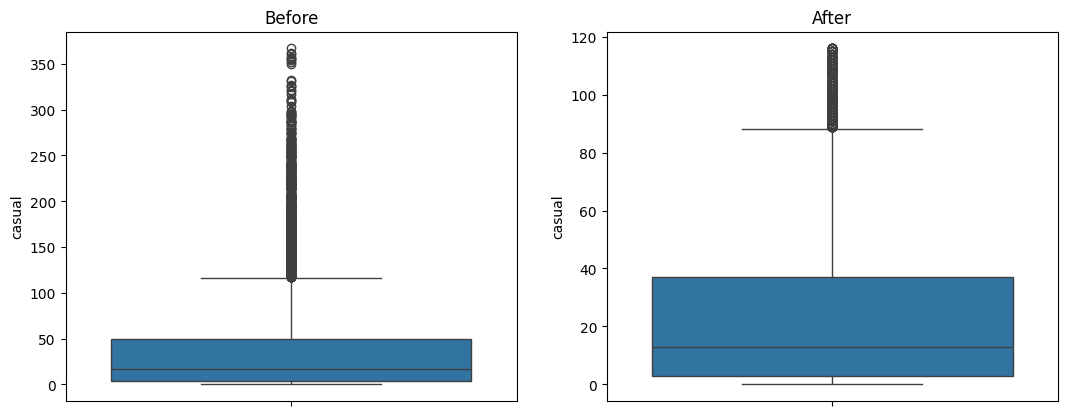

In [211]:
#Verifying Outliers in "casual" column of the new dataframe

plt.figure(figsize = (12.8, 4.8))

plt.subplot(1,2,1)
#count
sns.boxplot(y=df_orig["casual"])
plt.title(("Before"))

plt.subplot(1,2,2)
#count
sns.boxplot(y=df["casual"])
plt.title(("After"))

plt.show()

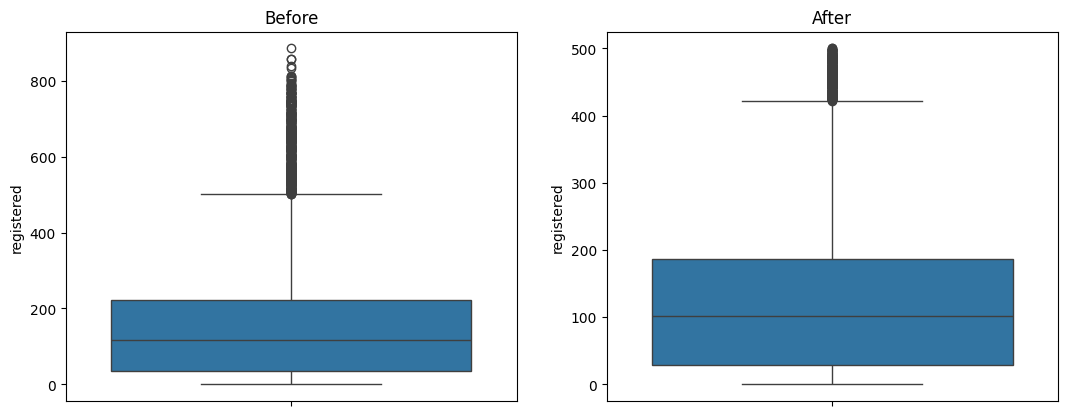

In [212]:
#Verifying Outliers in "registered" column of the new dataframe

plt.figure(figsize = (12.8, 4.8))

plt.subplot(1,2,1)
#count
sns.boxplot(y=df_orig["registered"])
plt.title(("Before"))

plt.subplot(1,2,2)
#count
sns.boxplot(y=df["registered"])
plt.title(("After"))

plt.show()

### **Observation:**
After treatment all the extreme outliers have been removed from the new dataframe and remaining values are within the reasonable range.

# **Distribution of Categorical variables**

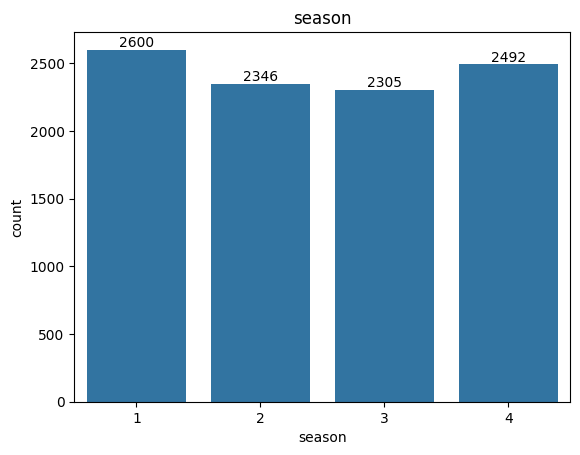

In [213]:
#season: season (1: spring, 2: summer, 3: fall, 4: winter)
ax=sns.countplot(x="season", data=df)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("season")
plt.show()

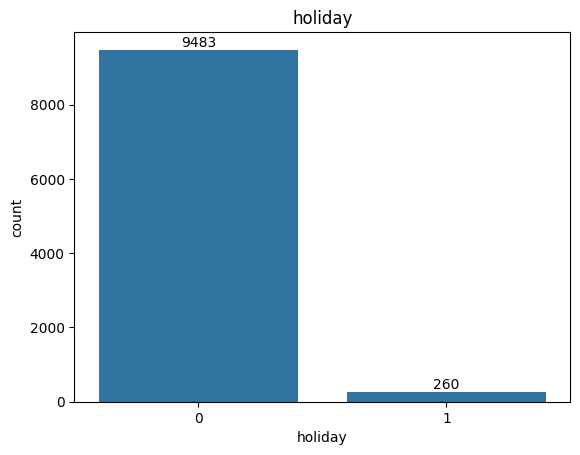

In [214]:
#holiday: whether day is a holiday or not
ax=sns.countplot(x="holiday", data=df)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("holiday")
plt.show()

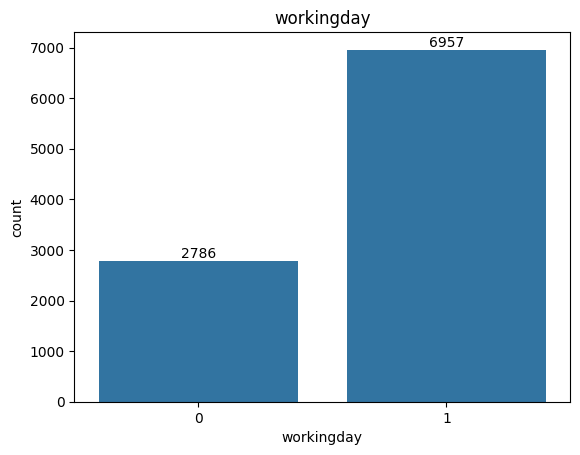

In [215]:
#workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
ax=sns.countplot(x="workingday", data=df)
ax.bar_label(ax.containers[0], fontsize=10,)
plt.title("workingday")
plt.show()

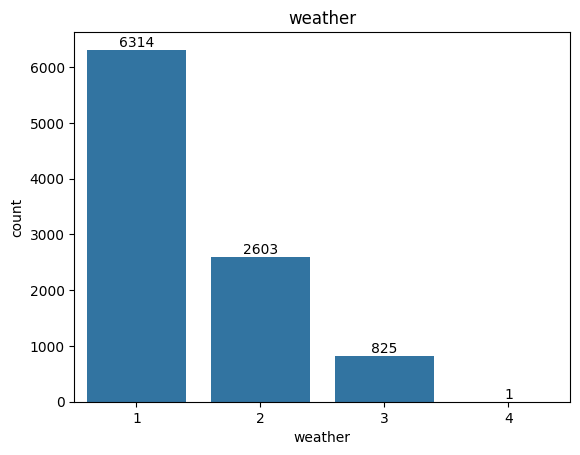

In [216]:
#weather:
#  1: Clear, Few clouds, partly cloudy, partly cloudy
#  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
ax=sns.countplot(x="weather", data=df)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("weather")
plt.show()

### **Observation:**
1.	The data is **well distributed** across all **seasons**.
2.	As expected, number of **holiday** data points are **very few** compared to non-holiday data points.
3.	**Most** of the data points belong to the normal weather condition when there was **no rainfall**. Very few data points correspond to rainy weather condition.


# **2. Relationship between the Dependent and Independent Variables.**

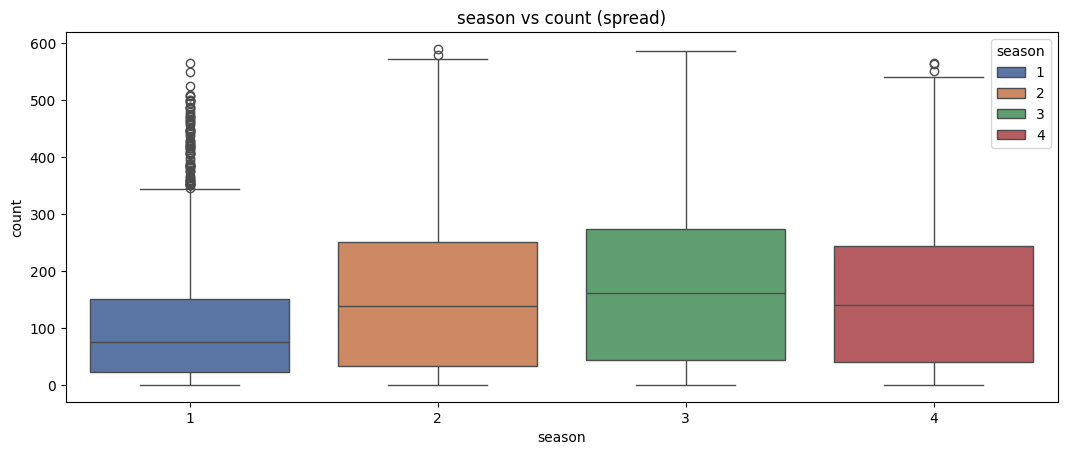

In [217]:
#season vs count
#season: season (1: spring, 2: summer, 3: fall, 4: winter)
plt.figure(figsize = (12.8, 4.8))
ax=sns.boxplot(x="season", y="count", data=df, hue="season", palette="deep")
plt.title("season vs count (spread)")
plt.show()

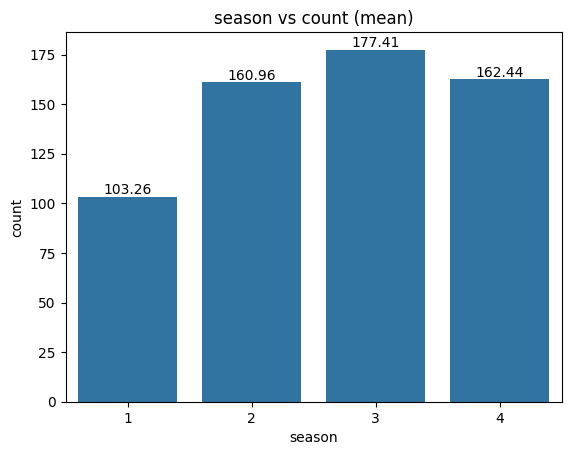

In [218]:
#season vs count
#season: season (1: spring, 2: summer, 3: fall, 4: winter)
ax=sns.barplot(x="season", y="count", data=df,estimator=np.mean,errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10, fmt="%.2f")
plt.title("season vs count (mean)")
plt.show()

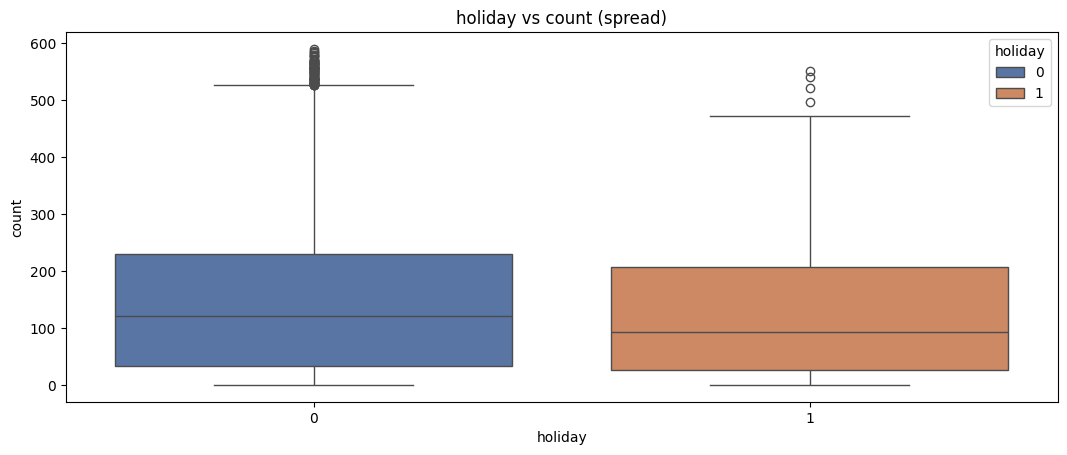

In [219]:
#holiday vs count
#holiday: whether day is a holiday or not
plt.figure(figsize = (12.8, 4.8))
ax=sns.boxplot(x="holiday", y="count", data=df, hue="holiday", palette="deep")
plt.title("holiday vs count (spread)")
plt.show()

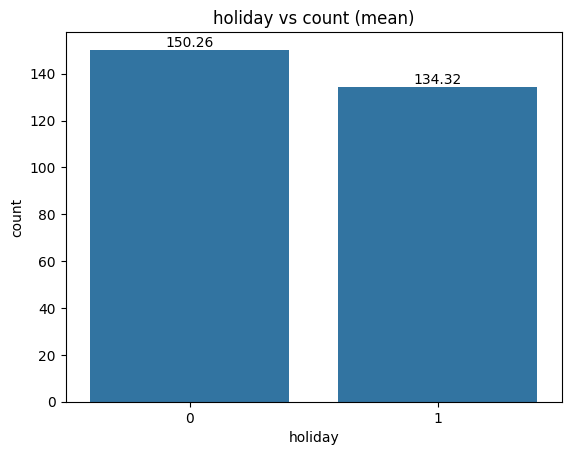

In [220]:
#holiday vs count
#holiday: whether day is a holiday or not
ax=sns.barplot(x="holiday", y="count", data=df,estimator=np.mean,errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10, fmt="%.2f")
plt.title("holiday vs count (mean)")
plt.show()

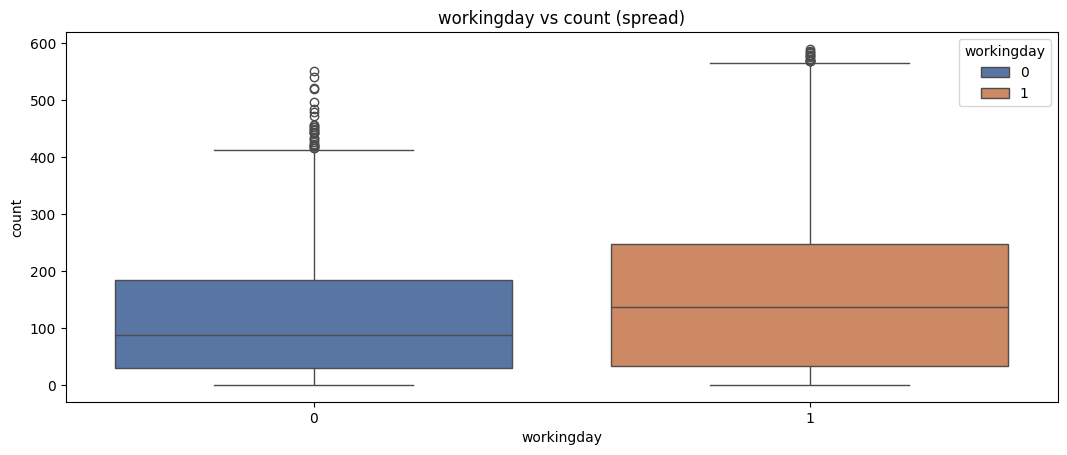

In [221]:
#workingday vs count
#workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
plt.figure(figsize = (12.8, 4.8))
ax=sns.boxplot(x="workingday", y="count", data=df, hue="workingday", palette="deep")
plt.title("workingday vs count (spread)")
plt.show()

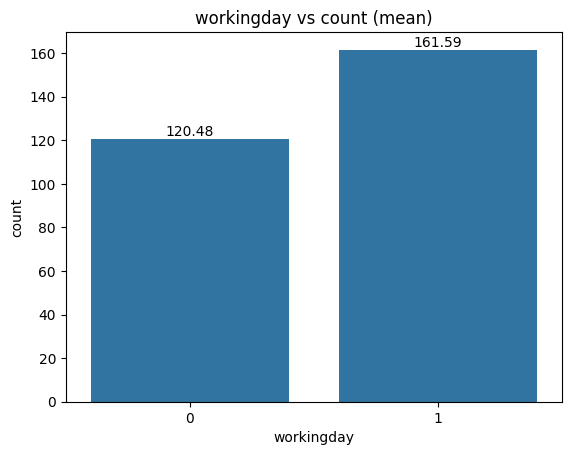

In [222]:
#workingday vs count
#workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
ax=sns.barplot(x="workingday", y="count", data=df,estimator=np.mean,errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10, fmt="%.2f")
plt.title("workingday vs count (mean)")
plt.show()

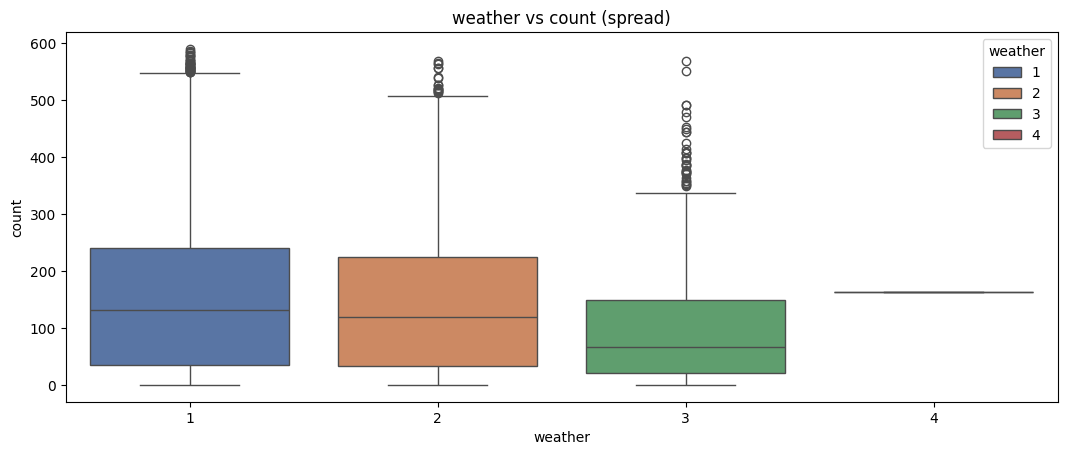

In [223]:
#weather vs count
#weather:
#  1: Clear, Few clouds, partly cloudy, partly cloudy
#  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
plt.figure(figsize = (12.8, 4.8))
ax=sns.boxplot(x="weather", y="count", data=df, hue="weather", palette="deep")
plt.title("weather vs count (spread)")
plt.show()

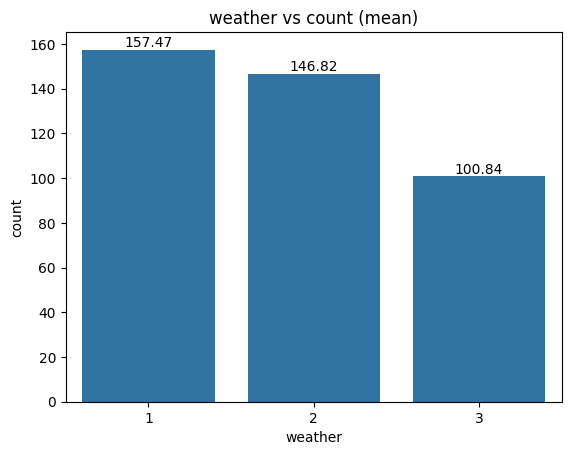

In [224]:
#weather vs count
#weather:
#  1: Clear, Few clouds, partly cloudy, partly cloudy
#  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
ax=sns.barplot(x="weather", y="count", data=df[df["weather"] != 4],estimator=np.mean,errorbar=None)  #Excluding "4" as it has just one data point
ax.bar_label(ax.containers[0], fontsize=10, fmt="%.2f")
plt.title("weather vs count (mean)")
plt.show()

<ipython-input-225-deaf372fbe7c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Blues")


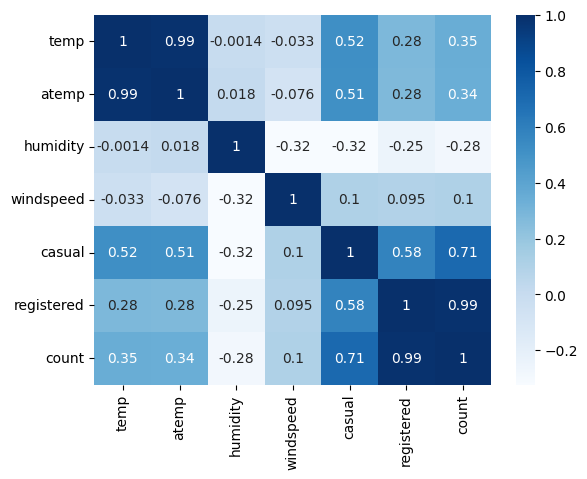

In [225]:
#Plotting Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

### **Observation:**
1.	Among season the average **count** of total rental bikes is **highest during “fall”** where as it is **lowest during “spring”**. Average count of total rental bikes is almost same during “summer” and “winter season.
2.	Average **count** of total rental bikes is **higher on the non-holiday** days than on holiday. It may be because people often choose to stay at home during holidays.
3.	**Demand** for rental bikes is **very high on working days** than on non-working days. This indicates people using Yulu electric cycles for commuting to their work places.
4.	**Demand** for Yulu's bike is **more during non-rainy day** than compared to days with rainfall. This must be because during rainfall in general people prefer closed transport like car, auto, bus etc. than an open bike to protect themselves from rain.


# **Hypothesis Testing**

# **3. Checking whether Working Day has effect on number of electric cycles rented?**

In [226]:
#Separating data for "working days" and "non-working days" in two different arrays
workingday = df[df["workingday"]==1]["count"]
non_workingday = df[df["workingday"]==0]["count"]

In [227]:
#Test for Normality
s,p= shapiro(workingday)
print("p-value for working day data shapiro test is: ",p)
s,p= shapiro(non_workingday)
print("p-value for non-working day data shapiro test is: ",p)

p-value for working day data shapiro test is:  0.0
p-value for non-working day data shapiro test is:  8.6529059133286e-40


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


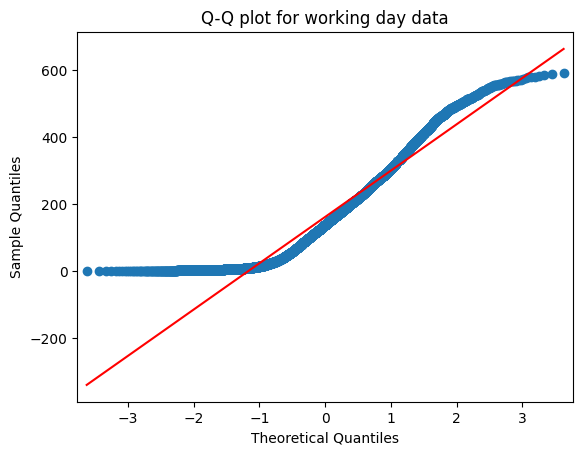

In [228]:
qqplot(workingday, line="s")
plt.title("Q-Q plot for working day data")
plt.show()

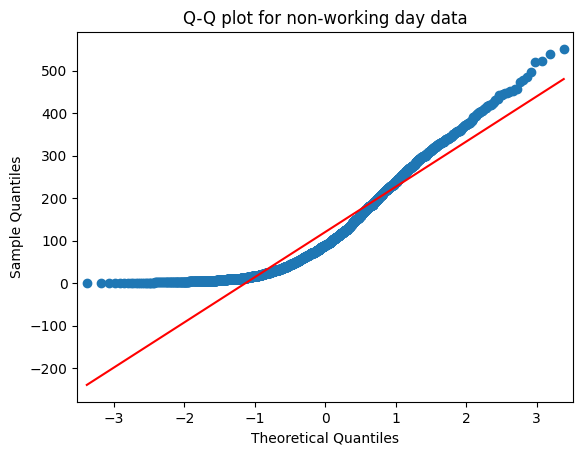

In [229]:
qqplot(non_workingday, line="s")
plt.title("Q-Q plot for non-working day data")
plt.show()

In [230]:
#Test for equality of variance
stat,p=levene(workingday,non_workingday)
print("p-value for equality of variance levene test is: ",p)

p-value for equality of variance levene test is:  6.6731086608963975e-53


### **Observation:**
The available data is **not normal** and **does not have equal variance** which are required conditions for **2- Sample T-Test**.
But **we will ignore this** and continue with our hypothesis testing.


## **2- Sample T-Test**

In [231]:
# Null Hypothesis (H0): Working Day has no effect on number of electric cycles rented and average number of electric cycles rented on Working and Non-working Days are same.
# Alternate Hypothesis (H1): Working Day has effect on number of electric cycles rented and average number of electric cycles rented on Working days is greater than that on Non-working Days.

# alpha = 0.05 (significance level)
alpha = 0.05


#Calculating test Statistics / p-value
t_stat,p_val = ttest_ind(workingday, non_workingday, alternative="greater")


#Deciding whether to accept or reject the Null Hypothesis.
if p_val < alpha:
    print("Reject the null hypothesis. There is significant evidence that Working Day has effect on number of electric cycles rented and average number of electric cycles rented on Working days is greater than that on Non-working Days.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that Working Day has effect on number of electric cycles rented and average number of electric cycles rented on Working days is greater than that on Non-working Days.")


Reject the null hypothesis. There is significant evidence that Working Day has effect on number of electric cycles rented and average number of electric cycles rented on Working days is greater than that on Non-working Days.


### **Conclusion:**
The Hypothesis testing shows that there is significant evidence that **Working Day has effect** on number of electric cycles rented and average number of electric **cycles rented on Working days is greater** than that on Non-working Days.
This shows that lot of working people are using Yulu electric cycles for commuting to their work places.
Yulu should do **target advertisement** for office going people while also providing incentives and offer to them. This will have very high chances of increasing customer base for Yulu.


# **4. Checking whether demand of bicycles on rent is the same for different Weather conditions?**

In [232]:
# weather = 4 just have 1 datapoint so we will not include it in our testing.
df[df["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [237]:
#Separating data for different weather in different arrays
weather_1 = df[df["weather"]==1]["count"]
weather_2 = df[df["weather"]==2]["count"]
weather_3 = df[df["weather"]==3]["count"]

In [238]:
#Test for Normality
s,p= shapiro(weather_1)
print("p-value for weather_1 data shapiro test is: ",p)
s,p= shapiro(weather_2)
print("p-value for weather_2 data shapiro test is: ",p)
s,p= shapiro(weather_3)
print("p-value for weather_3 data shapiro test is: ",p)

p-value for weather_1 data shapiro test is:  0.0
p-value for weather_2 data shapiro test is:  1.614323812029925e-36
p-value for weather_3 data shapiro test is:  4.91883133723732e-28


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


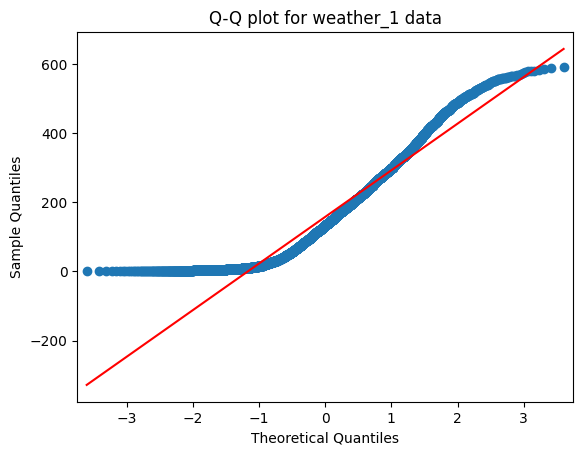

In [240]:
qqplot(weather_1, line="s")
plt.title("Q-Q plot for weather_1 data")
plt.show()

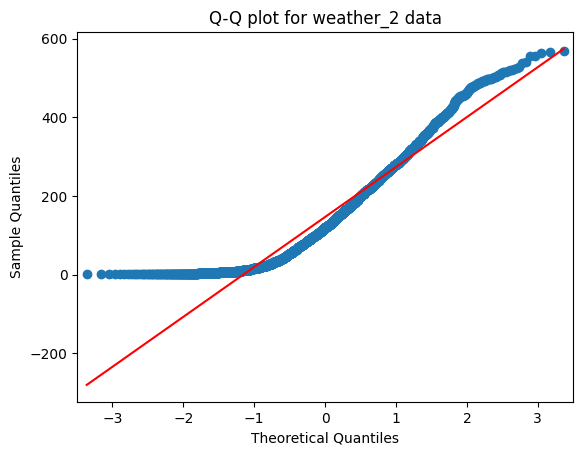

In [241]:
qqplot(weather_2, line="s")
plt.title("Q-Q plot for weather_2 data")
plt.show()

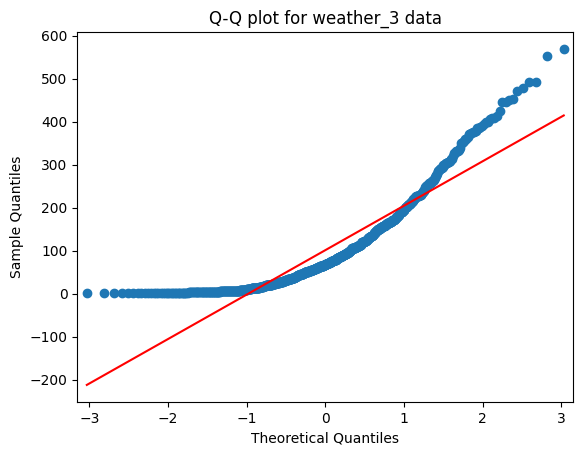

In [242]:
qqplot(weather_3, line="s")
plt.title("Q-Q plot for weather_3 data")
plt.show()

In [243]:
#Test for equality of variance
stat,p=levene(weather_1,weather_2,weather_3)
print("p-value for equality of variance levene test is: ",p)

p-value for equality of variance levene test is:  2.4052344293121339e-29


### **Observation:**
The available data is **not normal** and **does not have equal variance** which are required conditions for **One-way ANOVA test**.
But **we will ignore this** and continue with our hypothesis testing.

## **One-way ANOVA test**

In [244]:
# Null Hypothesis (H0): Demand of bicycles on rent is the same for different Weather conditions.
# Alternate Hypothesis (H1): Demand of bicycles on rent is different for different Weather conditions

# alpha = 0.05 (significance level)
alpha = 0.05


#Calculating test Statistics / p-value
f_stat,p_val = f_oneway(weather_1,weather_2,weather_3)


#Deciding whether to accept or reject the Null Hypothesis.
if p_val < alpha:
    print("Reject the null hypothesis. There is significant evidence that Demand of bicycles on rent is different for different Weather conditions")
else:
    print("Fail to reject the null hypothesis. Demand of bicycles on rent is the same for different Weather conditions.")


Reject the null hypothesis. There is significant evidence that Demand of bicycles on rent is different for different Weather conditions


### **Conclusion:**
The Hypothesis testing shows that there is **significant evidence** that Demand of bicycles on rent is d**ifferent for different Weather conditions**.
Earlier we also observed that Demand for Yulu's bike is more during non-rainy day than compared to days with rainfall. This must be because during rainfall in general people prefer closed transport like car, auto, bus etc. than an open bike to protect themselves from rain.
Yulu should **target more** cities and regions of India where **average rainfall is low** and **weather is clear** for most part of the year.


# **5. Checking whether demand of bicycles on rent is the same for different Seasons?**

In [249]:
#season: season (1: spring, 2: summer, 3: fall, 4: winter)
#Separating data for different weather in different arrays
season_1 = df[df["season"]==1]["count"]
season_2 = df[df["season"]==2]["count"]
season_3 = df[df["season"]==3]["count"]
season_4 = df[df["season"]==4]["count"]

In [250]:
#Test for Normality
s,p= shapiro(season_1)
print("p-value for season_1 data shapiro test is: ",p)
s,p= shapiro(season_2)
print("p-value for season_2 data shapiro test is: ",p)
s,p= shapiro(season_3)
print("p-value for season_3 data shapiro test is: ",p)
s,p= shapiro(season_4)
print("p-value for season_4 data shapiro test is: ",p)

p-value for season_1 data shapiro test is:  2.7325320054333933e-43
p-value for season_2 data shapiro test is:  9.619028028450546e-34
p-value for season_3 data shapiro test is:  4.512199952919516e-31
p-value for season_4 data shapiro test is:  4.844918618375094e-33


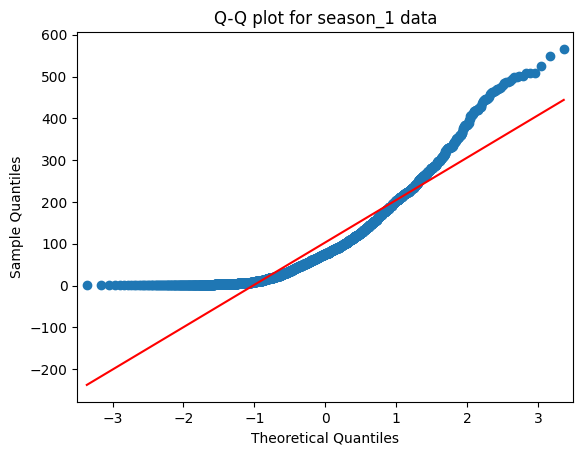

In [251]:
qqplot(season_1, line="s")
plt.title("Q-Q plot for season_1 data")
plt.show()

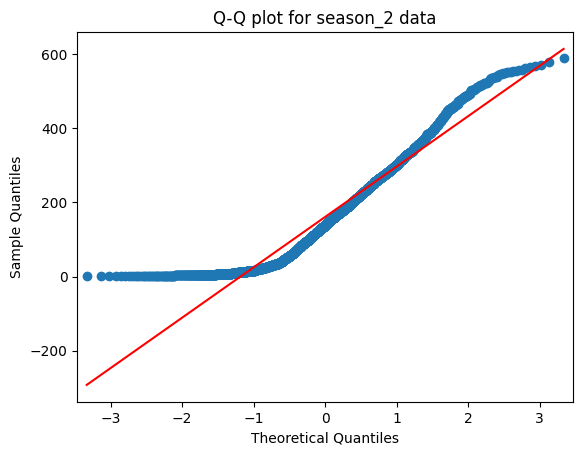

In [252]:
qqplot(season_2, line="s")
plt.title("Q-Q plot for season_2 data")
plt.show()

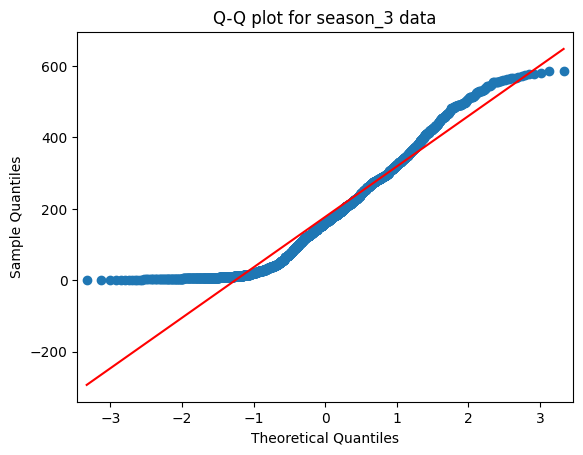

In [253]:
qqplot(season_3, line="s")
plt.title("Q-Q plot for season_3 data")
plt.show()

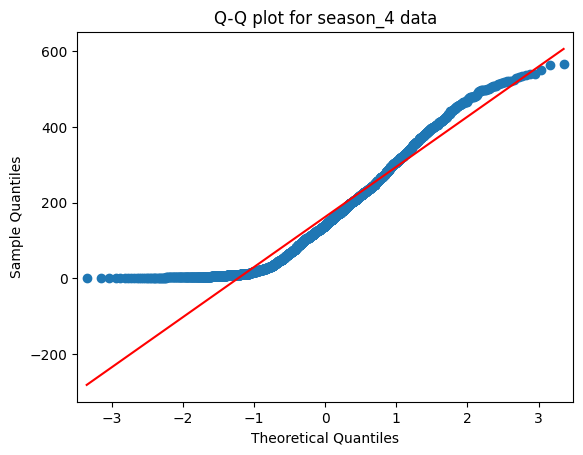

In [254]:
qqplot(season_4, line="s")
plt.title("Q-Q plot for season_4 data")
plt.show()

In [255]:
#Test for equality of variance
stat,p=levene(season_1,season_2,season_3,season_4)
print("p-value for equality of variance levene test is: ",p)

p-value for equality of variance levene test is:  2.0809838460364347e-90


### **Observation:**
The available data is **not normal** and **does not have equal variance** which are required conditions for **One-way ANOVA test**.
But **we will ignore this** and continue with our hypothesis testing.

## **One-way ANOVA test**

In [256]:
# Null Hypothesis (H0): Demand of bicycles on rent is the same for different Seasons.
# Alternate Hypothesis (H1): Demand of bicycles on rent is different for different Seasons.

# alpha = 0.05 (significance level)
alpha = 0.05


#Calculating test Statistics / p-value
f_stat,p_val = f_oneway(season_1,season_2,season_3,season_4)


#Deciding whether to accept or reject the Null Hypothesis.
if p_val < alpha:
    print("Reject the null hypothesis. There is significant evidence that Demand of bicycles on rent is different for different Seasons")
else:
    print("Fail to reject the null hypothesis. Demand of bicycles on rent is the same for different Seasons.")

Reject the null hypothesis. There is significant evidence that Demand of bicycles on rent is different for different Seasons


### **Conclusion:**
The Hypothesis testing shows that there is **significant evidence** that **demand** of bicycles on rent is **different for different Seasons**.
Earlier also we observed that among seasons the average count of total rental bikes is **highest during “fall”** whereas it is **lowest during “spring”**. Average count of total rental bikes is almost same during “summer” and “winter season.
Yulu should **plan** any activities which **reduces its capacity** of normal business, like training, maintenance etc. **during “spring” season** when demand is low.


# **6. Checking if Weather conditions are dependent on season or not?**

## **Chi-square Test for Independence**

In [264]:
# Null Hypothesis (H0): Weather conditions are independent of the season.
# Alternate Hypothesis (H1): Weather conditions are dependent on the season.


# alpha = 0.05 (significance level)
alpha = 0.05


#Creating a Contingency Table against ‘Weather’ & ‘Season’ columns
conti_table = pd.crosstab(df["season"], df["weather"])


#Calculating test Statistics / p-value
chi_stat,p_val,dof,exp_frq = chi2_contingency(conti_table)


#Deciding whether to accept or reject the Null Hypothesis.
if p_val < alpha:
    print("Reject the null hypothesis. Weather conditions are dependent on the season.")
else:
    print("Fail to reject the null hypothesis. Weather conditions are independent of the season.")



Reject the null hypothesis. Weather conditions are dependent on the season.


### **Conclusion:**
The Hypothesis testing shows that **weather conditions are dependent on the season**.

This means Yulu can expect similar weather conditions within each season and different weather condition across different seasons.


# **7. Recommendations:**

1. Demand for electric **cycles on Working days is greater** than that on Non-working Days.
This shows that lot of working people are using Yulu electric cycles for commuting to their work places.
Yulu should do **target advertisement** for **office going people** while also providing incentives and offers to them. This will have very high chances of increasing customer base for Yulu. Also for **business expansion** Yulu should focus on cities or areas where there is **higher concentration of office going people**.  

2. **Demand** for Yulu's bike is **more during non-rainy day** than compared to days with rainfall. This must be because during rainfall in general people prefer closed transportation like car, auto, bus etc. than an open bike to protect themselves from rain.
Yulu should **target more** cities and regions of India where **average rainfall is low** and **weather is clear** for most part of the year.

3. Among **seasons** the demand for rental bikes is **highest during “fall”** whereas it is **lowest during “spring”**. Average demand for rental bikes is almost same during “summer” and “winter season.
Yulu should **plan** any activities which **reduces its capacity** of normal business, like training, maintenance etc. **during “spring” season** when demand is low. Alternatively Yulu may also plan to **reduce** its bike stocks and workforce during "spring" to **increase it profit margin**.
